In [1]:
using Pkg
pkg"activate ."
pkg"add ForwardDiff"
pkg"add Plots"
pkg"add GR"

Activating environment at `~/Documents/disciplinas/cm042/notebooks/Project.toml`
  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %.5 %Fetching: [==========================>              ]  62.6 % ]  96.1 %

┌ Warning: Some registries failed to update:
│     — /home/abel/.julia/registries/General — failed to fetch from repo
└ @ Pkg.Types /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.3/Pkg/src/Types.jl:1199


 Resolving package versions...
 Installed Contour ─ v0.5.2
  Updating `~/Documents/disciplinas/cm042/notebooks/Project.toml`
 [no changes]
  Updating `~/Documents/disciplinas/cm042/notebooks/Manifest.toml`
  [d38c429a] ↑ Contour v0.5.1 ⇒ v0.5.2
 Resolving package versions...
  Updating `~/Documents/disciplinas/cm042/notebooks/Project.toml`
 [no changes]
  Updating `~/Documents/disciplinas/cm042/notebooks/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/Documents/disciplinas/cm042/notebooks/Project.toml`
 [no changes]
  Updating `~/Documents/disciplinas/cm042/notebooks/Manifest.toml`
 [no changes]


In [2]:
using Plots
gr(size=(600,600))

Plots.GRBackend()

# Curvas

┌ Info: Saved animation to 
│   fn = /home/abel/Documents/disciplinas/cm042/notebooks/tmp.gif
└ @ Plots /home/abel/.julia/packages/Plots/B2J6j/src/animation.jl:98


Plots.AnimatedGif("/home/abel/Documents/disciplinas/cm042/notebooks/tmp.gif")
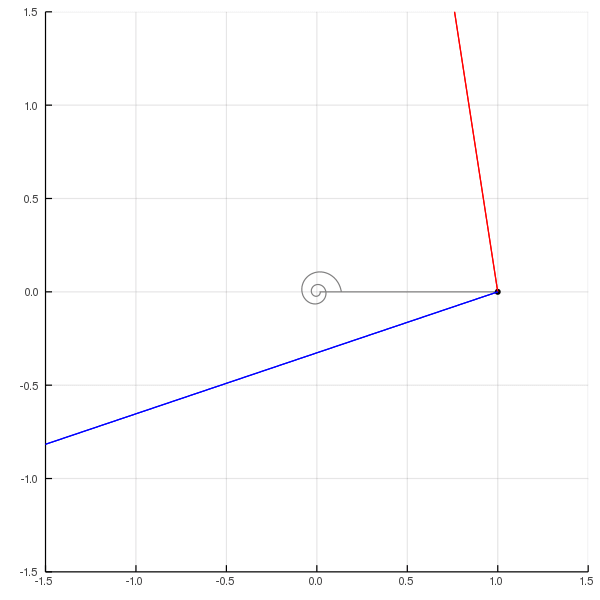

In [3]:
using ForwardDiff

x(t) = exp(-t) * cos(2π * t)
y(t) = exp(-t) * sin(2π * t)
xl(t) = ForwardDiff.derivative(x, t)
yl(t) = ForwardDiff.derivative(y, t)
xll(t) = ForwardDiff.derivative(xl, t)
yll(t) = ForwardDiff.derivative(yl, t)

N = 180 * 4
δ = 4
cauda = div(N, 2)
domt = range(0, 4, length=N)
@gif for i = 1:δ:N
    ti = domt[i]
    subt = domt[rem.(N .- 1 .+ (i-cauda:i), N) .+ 1]
    plot(x.(subt), y.(subt), c=:gray, leg=false)
    scatter!([x(ti)], [y(ti)], ms=4, c=:black)
    plot!(x(ti) .+ [0; xl(ti)], y(ti) .+ [0; yl(ti)], l=:arrow, c=:red)
    plot!(x(ti) .+ [0; xll(ti)], y(ti) .+ [0; yll(ti)], l=:arrow, c=:blue)
    xlims!(-1.5, 1.5)
    ylims!(-1.5, 1.5)
end

┌ Info: Saved animation to 
│   fn = /home/abel/Documents/disciplinas/cm042/notebooks/tmp.gif
└ @ Plots /home/abel/.julia/packages/Plots/B2J6j/src/animation.jl:98


Plots.AnimatedGif("/home/abel/Documents/disciplinas/cm042/notebooks/tmp.gif")
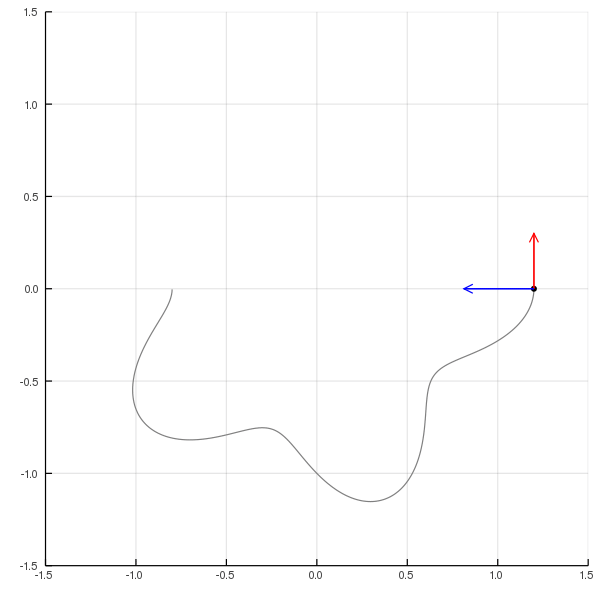

In [4]:
using ForwardDiff

x(t) = cos(t / 4) * (1 + 0.2 * cos(5*t / 4))
y(t) = sin(t / 4) * (1 + 0.2 * cos(5*t / 4))
xl(t) = ForwardDiff.derivative(x, t)
yl(t) = ForwardDiff.derivative(y, t)
xll(t) = ForwardDiff.derivative(xl, t)
yll(t) = ForwardDiff.derivative(yl, t)

N = 180 * 4
δ = 4
cauda = div(N, 2)
domt = range(0, 8π, length=N)
@gif for i = 1:δ:N
    ti = domt[i]
    subt = domt[rem.(N .- 1 .+ (i-cauda:i), N) .+ 1]
    plot(x.(subt), y.(subt), c=:gray, leg=false)
    scatter!([x(ti)], [y(ti)], ms=4, c=:black)
    plot!(x(ti) .+ [0; xl(ti)], y(ti) .+ [0; yl(ti)], l=:arrow, c=:red)
    plot!(x(ti) .+ [0; xll(ti)], y(ti) .+ [0; yll(ti)], l=:arrow, c=:blue)
    xlims!(-1.5, 1.5)
    ylims!(-1.5, 1.5)
end

┌ Info: Saved animation to 
│   fn = /home/abel/Documents/disciplinas/cm042/notebooks/tmp.gif
└ @ Plots /home/abel/.julia/packages/Plots/B2J6j/src/animation.jl:98


Plots.AnimatedGif("/home/abel/Documents/disciplinas/cm042/notebooks/tmp.gif")
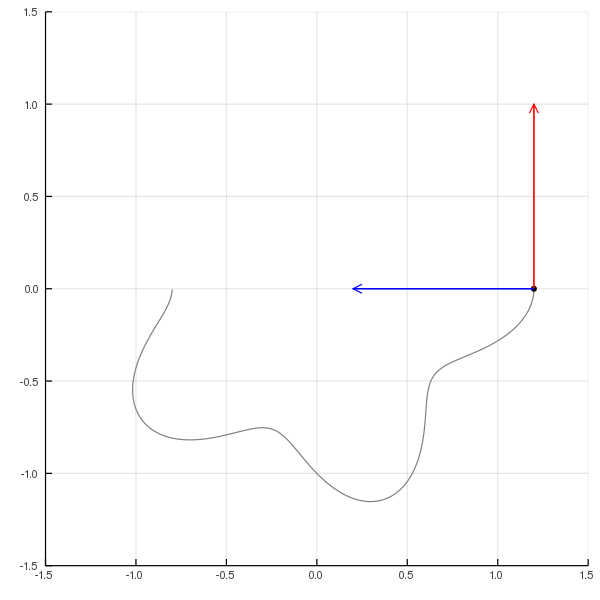

In [5]:
using ForwardDiff

x(t) = cos(t / 4) * (1 + 0.2 * cos(5*t / 4))
y(t) = sin(t / 4) * (1 + 0.2 * cos(5*t / 4))
xl(t) = ForwardDiff.derivative(x, t)
yl(t) = ForwardDiff.derivative(y, t)
Txl(t) = xl(t) / sqrt(xl(t)^2 + yl(t)^2)
Tyl(t) = yl(t) / sqrt(xl(t)^2 + yl(t)^2)
xll(t) = ForwardDiff.derivative(Txl, t)
yll(t) = ForwardDiff.derivative(Tyl, t)
Txll(t) = xll(t) / sqrt(xll(t)^2 + yll(t)^2)
Tyll(t) = yll(t) / sqrt(xll(t)^2 + yll(t)^2)

N = 180 * 4
δ = 4
cauda = div(N, 2)
domt = range(0, 8π, length=N)
@gif for i = 1:δ:N
    ti = domt[i]
    subt = domt[rem.(N .- 1 .+ (i-cauda:i), N) .+ 1]
    plot(x.(subt), y.(subt), c=:gray, leg=false)
    scatter!([x(ti)], [y(ti)], ms=4, c=:black)
    plot!(x(ti) .+ [0; Txl(ti)], y(ti) .+ [0; Tyl(ti)], l=:arrow, c=:red)
    plot!(x(ti) .+ [0; Txll(ti)], y(ti) .+ [0; Tyll(ti)], l=:arrow, c=:blue)
    xlims!(-1.5, 1.5)
    ylims!(-1.5, 1.5)
end

┌ Info: Saved animation to 
│   fn = /home/abel/Documents/disciplinas/cm042/notebooks/tmp.gif
└ @ Plots /home/abel/.julia/packages/Plots/B2J6j/src/animation.jl:98


Plots.AnimatedGif("/home/abel/Documents/disciplinas/cm042/notebooks/tmp.gif")
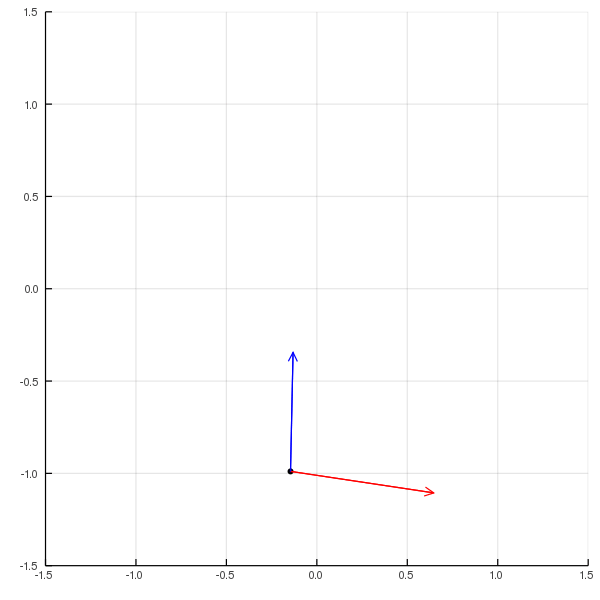

In [6]:
using ForwardDiff

x(t) = cos(-8*exp(-0.1t))
y(t) = sin(-8*exp(-0.1t))
xl(t) = ForwardDiff.derivative(x, t)
yl(t) = ForwardDiff.derivative(y, t)
xll(t) = ForwardDiff.derivative(xl, t)
yll(t) = ForwardDiff.derivative(yl, t)

N = 180 * 4
δ = 4
cauda = div(N, 2)
domt = range(0, 8π, length=N)
@gif for i = 1:δ:N
    ti = domt[i]
    subt = domt[max(1,i-cauda):i]
    plot(x.(subt), y.(subt), c=:gray, leg=false)
    scatter!([x(ti)], [y(ti)], ms=4, c=:black)
    plot!(x(ti) .+ [0; xl(ti)], y(ti) .+ [0; yl(ti)], l=:arrow, c=:red)
    plot!(x(ti) .+ [0; xll(ti)], y(ti) .+ [0; yll(ti)], l=:arrow, c=:blue)
    xlims!(-1.5, 1.5)
    ylims!(-1.5, 1.5)
end

┌ Info: Saved animation to 
│   fn = /home/abel/Documents/disciplinas/cm042/notebooks/tmp.gif
└ @ Plots /home/abel/.julia/packages/Plots/B2J6j/src/animation.jl:98


Plots.AnimatedGif("/home/abel/Documents/disciplinas/cm042/notebooks/tmp.gif")
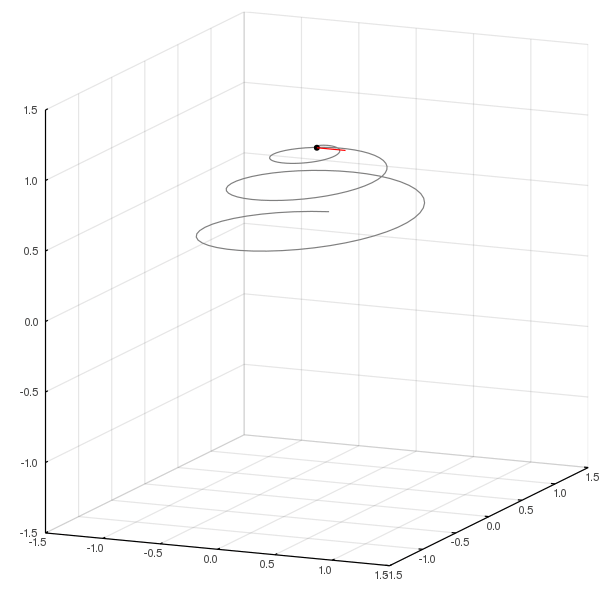

In [7]:
using ForwardDiff

θ(t) = 4t
ϕ(t) = t / 4
x(t) = cos(θ(t)) * sin(ϕ(t))
y(t) = sin(θ(t)) * sin(ϕ(t))
z(t) = cos(ϕ(t))
xl(t) = ForwardDiff.derivative(x, t)
yl(t) = ForwardDiff.derivative(y, t)
zl(t) = ForwardDiff.derivative(z, t)

N = 180 * 4
δ = 4
cauda = div(N, 5)
domt = range(0, 8π, length=N)
@gif for i = 1:δ:N
    ti = domt[i]
    subt = domt[rem.(N .- 1 .+ (i-cauda:i), N) .+ 1]
    plot(x.(subt), y.(subt), z.(subt), c=:gray, leg=false)
    scatter!([x(ti)], [y(ti)], [z(ti)], ms=4, c=:black)
    plot!(x(ti) .+ [0; xl(ti)], y(ti) .+ [0; yl(ti)], z(ti) .+ [0; zl(ti)], l=:arrow, c=:red)
    xlims!(-1.5, 1.5)
    ylims!(-1.5, 1.5)
    zlims!(-1.5, 1.5)
end

┌ Info: Saved animation to 
│   fn = /home/abel/Documents/disciplinas/cm042/notebooks/tmp.gif
└ @ Plots /home/abel/.julia/packages/Plots/B2J6j/src/animation.jl:98


Plots.AnimatedGif("/home/abel/Documents/disciplinas/cm042/notebooks/tmp.gif")
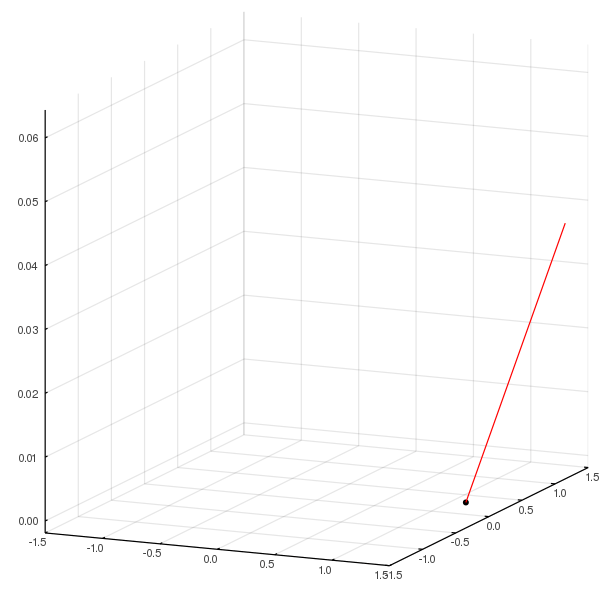

In [8]:
using ForwardDiff

x(t) = 1.3 * cos(2t)
y(t) = 1.3 * sin(2t)
z(t) = t / 16
xl(t) = ForwardDiff.derivative(x, t)
yl(t) = ForwardDiff.derivative(y, t)
zl(t) = ForwardDiff.derivative(z, t)

N = 180 * 4
δ = 4
cauda = N
domt = range(0, 8π, length=N)
@gif for i = 1:δ:N
    ti = domt[i]
    subt = domt[max(1,i-cauda):i]
    plot(x.(subt), y.(subt), z.(subt), c=:gray, leg=false)
    scatter!([x(ti)], [y(ti)], [z(ti)], ms=4, c=:black)
    plot!(x(ti) .+ [0; xl(ti)], y(ti) .+ [0; yl(ti)], z(ti) .+ [0; zl(ti)], l=:arrow, c=:red)
    xlims!(-1.5, 1.5)
    ylims!(-1.5, 1.5)
end

┌ Info: Saved animation to 
│   fn = /home/abel/Documents/disciplinas/cm042/notebooks/tmp.gif
└ @ Plots /home/abel/.julia/packages/Plots/B2J6j/src/animation.jl:98


Plots.AnimatedGif("/home/abel/Documents/disciplinas/cm042/notebooks/tmp.gif")
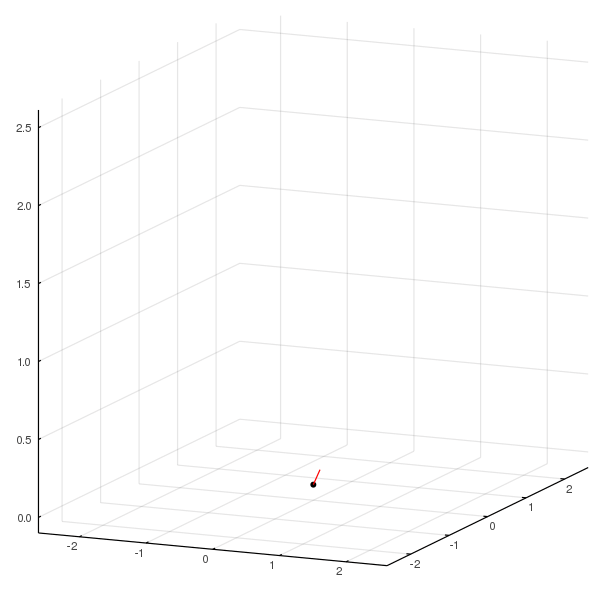

In [9]:
using ForwardDiff

θ(t) = t + 0.1t^2
z(t) = 0.1t
x(t) = cos(θ(t)) * z(t)
y(t) = sin(θ(t)) * z(t)
xl(t) = ForwardDiff.derivative(x, t)
yl(t) = ForwardDiff.derivative(y, t)
zl(t) = ForwardDiff.derivative(z, t)

N = 180 * 4
δ = 4
cauda = div(N, 5)
domt = range(0, 8π, length=N)
@gif for i = 1:δ:N
    ti = domt[i]
    subt = domt[max(1,i-cauda):i]
    plot(x.(subt), y.(subt), z.(subt), c=:gray, leg=false)
    scatter!([x(ti)], [y(ti)], [z(ti)], ms=4, c=:black)
    plot!(x(ti) .+ [0; xl(ti)], y(ti) .+ [0; yl(ti)], z(ti) .+ [0; zl(ti)], l=:arrow, c=:red)
    maxz = maximum(z.(domt)) + 0.1
    xlims!(-maxz, maxz)
    ylims!(-maxz, maxz)
    zlims!( -0.1, maxz)
end

## Curvatura

┌ Info: Saved animation to 
│   fn = /home/abel/Documents/disciplinas/cm042/notebooks/tmp.gif
└ @ Plots /home/abel/.julia/packages/Plots/B2J6j/src/animation.jl:98


Plots.AnimatedGif("/home/abel/Documents/disciplinas/cm042/notebooks/tmp.gif")
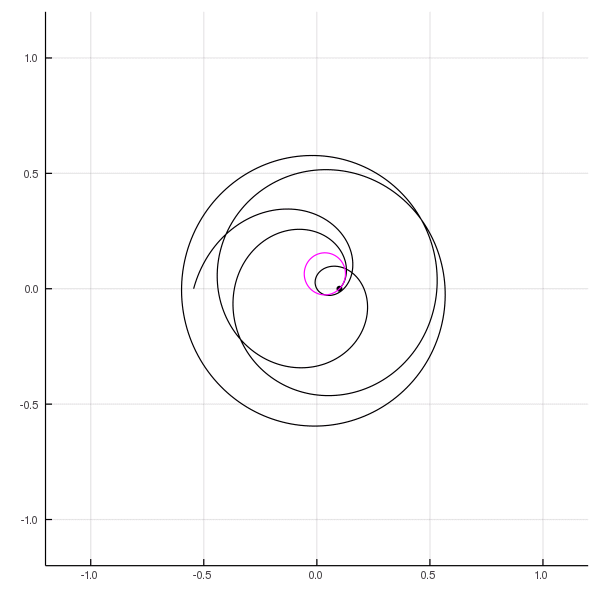

In [10]:
using ForwardDiff

ρ(t) = 0.1 + 0.1t - 0.005t^2
x(t) = cos(t) * ρ(t)
y(t) = sin(t) * ρ(t)
xl(t) = ForwardDiff.derivative(x, t)
yl(t) = ForwardDiff.derivative(y, t)
xll(t) = ForwardDiff.derivative(xl, t)
yll(t) = ForwardDiff.derivative(yl, t)
Tx(t) = xl(t) / sqrt(xl(t)^2 + yl(t)^2)
Ty(t) = yl(t) / sqrt(xl(t)^2 + yl(t)^2)
Txl(t) = ForwardDiff.derivative(Tx, t)
Tyl(t) = ForwardDiff.derivative(Ty, t)
Nx(t) = Txl(t) / sqrt(Txl(t)^2 + Tyl(t)^2)
Ny(t) = Tyl(t) / sqrt(Txl(t)^2 + Tyl(t)^2)
κ(t) = sqrt(Txl(t)^2 + Tyl(t)^2) / sqrt(xl(t)^2 + yl(t)^2)

N = 180 * 4
δ = 1
cauda = div(N, 2)
domt = range(0, 8π, length=N)
c, s = cos.(range(0, 2π, length=60)), sin.(range(0, 2π, length=60))
@gif for i = 1:δ:N
    ti = domt[i]
    plot(x.(domt), y.(domt), c=:black, leg=false)
    scatter!([x(ti)], [y(ti)], ms=4, c=:black)
    R = 1 / κ(ti)
    C, S = x(ti) .+ Nx(ti) * R .+ R * c, y(ti) .+ Ny(ti) * R .+ R * s
    plot!(C, S, c=:magenta)
    xlims!(-1.2, 1.2)
    ylims!(-1.2, 1.2)
end